In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import os
from tqdm import tqdm

from scipy.spatial.distance import pdist
from scipy import linalg

import matplotlib.pyplot as plt

import re

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import SpectralClustering

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from time import time
import psutil

## Data Processing

In [ ]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

# Fetch the 20 newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories,remove=('headers', 'footers', 'quotes'))

# Create a DataFrame with data and target columns
data = pd.DataFrame({'data': newsgroups_data.data, 
                   'target': newsgroups_data.target, 
                   'target_names': [newsgroups_data.target_names[i] for i in newsgroups_data.target]})

In [ ]:
# Function to remove newline characters and notations
def clean_text(text):
    # Remove newline characters and other structural notations
    cleaned_text = text.replace('\n', ' ').replace('<[^>]*>', '').replace('[\W_]+', ' ')
    return cleaned_text

# Define a custom pre-processing function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)  # This regex removes all digits

In [ ]:
data['data'] = data['data'].apply(clean_text)
data

In [ ]:
data_df_text = data["data"]
data_df_text

In [ ]:
labels = data["target"].tolist()
set(labels)

## Vectorize Text

In [ ]:
# Get NLTK English stopwords
# nltk_stopwords = set(stopwords.words('english'))

# Create a TF-IDF vectorizer with default English stopwords and remove numbers
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df = 0.5, stop_words='english')

# Fit and transform the text data using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data_df_text)

In [ ]:
data_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
data_df

In [ ]:
data_df["labels"] = labels
data_df

In [ ]:
data_df.to_csv("d4.csv")

## Data Import

In [2]:
data = pd.read_csv("d4.csv", index_col= 0)
data

,00,000,00000,01,02,03,04,05,06,0674,...,zealand,zero,zeus,zip,zone,zoo,zoom,zooming,zyxel,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [3]:
data_df = data.drop(["labels"], axis=1)

In [4]:
data_df

,00,000,00000,01,02,03,04,05,06,0674,...,yuv,zealand,zero,zeus,zip,zone,zoo,zoom,zooming,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
labels = data["labels"].tolist()
set(labels)

{0, 1, 2, 3}

# Experiments

In [6]:
def memory_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    return memory_info.vms / 1024

In [7]:
def spectral_clustering(dataframe, labels, similarity_graph, laplacian, number_of_clusters):

    # Pairwise distances
    dimension = dataframe.shape[0]
    dist_ = pdist(dataframe)
    dist_mat = np.zeros([dimension, dimension])
    dist = iter(dist_)
    for i in tqdm(range(dimension)):
        for j in range(i+1, dimension):  
            d = next(dist)
            dist_mat[i,j] = d
            dist_mat[j,i] = d


    if similarity_graph == "full":

        #calculate local sigma
        sigmas = np.zeros(dimension)
        for i in tqdm(range(len(dist_mat))):
            sigmas[i] = sorted(dist_mat[i])[102]

        # Adjaceny matrix with optimal sigma
        adjacency_matrix = np.zeros([dimension, dimension])
        dist = iter(dist_)
        for i in tqdm(range(dimension)):
            for j in range(i+1, dimension):  
                d = np.exp(-1*next(dist)**2/(sigmas[i]*sigmas[j]))
                adjacency_matrix[i,j] = d
                adjacency_matrix[j,i] = d

    
    elif similarity_graph == "eps":

        # Adjaceny matrix with epsilon threshold
        epsilon = 5.00
        adjacency_matrix = np.zeros([dimension, dimension])
        dist = iter(dist_)
        
        for i in tqdm(range(dimension)):
            for j in range(i+1, dimension):
                if next(dist) < epsilon:
                    d = 1
                else:
                    d = 0
                adjacency_matrix[i,j] = d
                adjacency_matrix[j,i] = d


    elif similarity_graph == "knn":

        # Adjaceny matrix with k-neighbours
        k = 333
        adjacency_matrix = np.zeros([dimension, dimension])
        
        for i in tqdm(range(dimension)):
            # Sort distances for node i and get indices of the k nearest neighbors
            sorted_indices = np.argsort(dist_mat[i])
            k_nearest_indices = sorted_indices[1:k+1]  # Exclude the node itself
        
            # Update the adjacency matrix
            adjacency_matrix[i, k_nearest_indices] = 1


    else:

        # Adjaceny matrix with mutual k-neighbours
        k = 333
        adjacency_matrix = np.zeros([dimension, dimension])
        
        for i in tqdm(range(dimension)):
            # Sort distances for node i and get indices of the k nearest neighbors
            sorted_indices = np.argsort(dist_mat[i])
            k_nearest_indices = sorted_indices[1:k+1]  # Exclude the node itself
        
            for neighbor in k_nearest_indices:
                # Check if node i is also among the k-nearest neighbors of the current neighbor
                neighbor_sorted_indices = np.argsort(dist_mat[neighbor])
                if i in neighbor_sorted_indices[1:k+1]:
                    # Connect nodes if they are mutual k-nearest neighbors
                    adjacency_matrix[i, neighbor] = 1
                    adjacency_matrix[neighbor, i] = 1


    
    # Calculate degree matrix
    degree_matrix = np.sum(adjacency_matrix, axis=0) * np.eye(dimension)
    

    if laplacian == "sym":

        # Normalized Symmetric laplacian matrix
        d_half = linalg.fractional_matrix_power(degree_matrix, -0.5)
        laplacian_matrix_normalized = np.matmul(np.matmul(d_half, adjacency_matrix), d_half)

    if laplacian == "rw":

        # Normalized Random Walk laplacian matrix
        d_inverse = linalg.fractional_matrix_power(degree_matrix, -1)
        laplacian_matrix_normalized = np.matmul(d_inverse, adjacency_matrix)


    # Calculating eigenvalues and eigenvectors
    e, v = np.linalg.eigh(laplacian_matrix_normalized)

    # Eigen features for k
    k = number_of_clusters
    X = v[:, -1*k:]

    # Kmeans
    clustering = KMeans(n_clusters = number_of_clusters)
    clustering.fit(X)
    
    cluster_labels = clustering.labels_
    
    return silhouette_score(dataframe, cluster_labels), adjusted_rand_score(labels, cluster_labels)

In [8]:
similarity_graphs = ["full", "eps", "knn", "mknn"]
laplacian_methods = ["sym", "rw"]

silhouette_scores = []
adjusted_rand_scores = []

sim_graph = []
laplacian = []

comp_time = []
comp_memory = []



for graph in similarity_graphs:

    for laplace in laplacian_methods:

        sim_graph.append(graph)
        
        laplacian.append(laplace)

        start_time = time()
        start_memory = memory_usage()
        si, ar = spectral_clustering(data_df, labels, graph, laplace, 4)
        end_memory = memory_usage()
        end_time = time()

        comp_time.append(end_time - start_time)
        comp_memory.append(end_memory - start_memory)

        silhouette_scores.append(si)
        adjusted_rand_scores.append(ar)

100%|█████████████████████████████████████████████████████████████████████████████| 3330/3330 [00:08<00:00, 405.96it/s]
C:\Users\mondal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|█████████████████████████████████████████████████████████████████████████████| 3330/3330 [00:07<00:00, 438.98it/s]
C:\Users\mondal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
100%|████████████████████████████████████████████████████████████████████████████| 3330/3330 [00:01<00:00, 2029.84it/s]
C:\Users\mondal\AppData\Loca

In [9]:
experiment_20newsgroups = pd.DataFrame(list(zip(sim_graph,laplacian,silhouette_scores,adjusted_rand_scores,comp_time, comp_memory)), 
             columns= ["graph", "laplacian", "silhouette", "adjusted_rand","time","memory"])

experiment_20newsgroups["graph_laplacian"] = experiment_20newsgroups["graph"] + "_" + experiment_20newsgroups["laplacian"]

experiment_20newsgroups

,graph,laplacian,silhouette,adjusted_rand,time,memory,graph_laplacian
0,full,sym,0.010254,0.170191,199.913734,165148.0,full_sym
1,full,rw,-0.011529,0.000314,190.734156,32.0,full_rw
2,eps,sym,-0.002665,-0.000572,188.525518,-28.0,eps_sym
3,eps,rw,-0.002665,-0.000572,184.818863,32.0,eps_rw
4,knn,sym,0.003482,0.416984,187.086485,-32.0,knn_sym
5,knn,rw,-0.055085,0.001904,179.389141,80.0,knn_rw
6,mknn,sym,-0.064599,0.296052,321.734620,0.0,mknn_sym
7,mknn,rw,-0.069863,0.320177,312.560945,48.0,mknn_rw


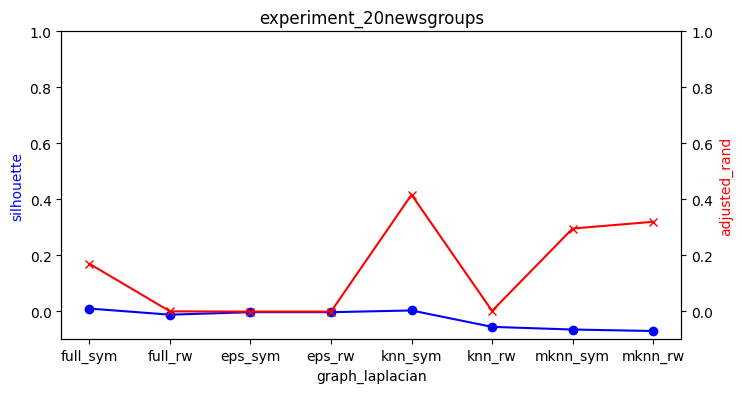

In [10]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot time on the first y-axis
ax.plot(experiment_20newsgroups['graph_laplacian'], experiment_20newsgroups['silhouette'], marker='o', color='b', label='Time (seconds)')

# Create a second y-axis
ax2 = ax.twinx()

# Plot memory on the second y-axis
ax2.plot(experiment_20newsgroups['graph_laplacian'], experiment_20newsgroups['adjusted_rand'], marker='x', color='r', label='Memory (KB)')

# Set labels and legends
ax.set_xlabel('graph_laplacian')
ax.set_ylabel('silhouette', color='b')
ax2.set_ylabel('adjusted_rand', color='r')

ax.set_ylim(-0.1, 1)
ax2.set_ylim(-0.1, 1)  # Adjust the multiplier as needed


# Add legends
# ax.legend(loc='upper left')
# ax2.legend(loc='upper right')

# Show the plot
plt.title('experiment_20newsgroups')
plt.show()

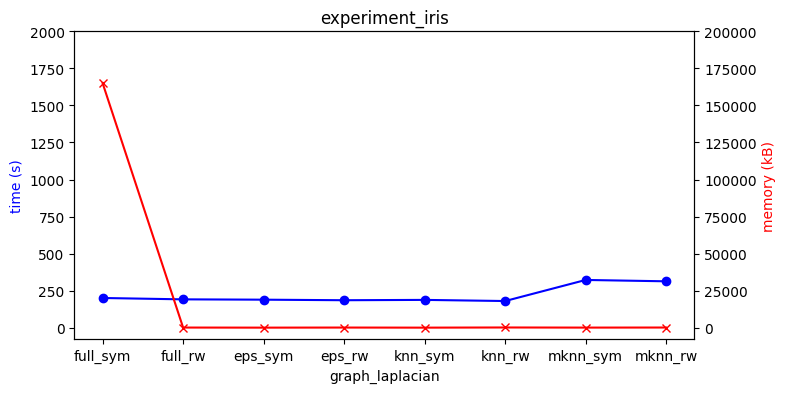

In [16]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot time on the first y-axis
ax.plot(experiment_20newsgroups['graph_laplacian'], experiment_20newsgroups['time'], marker='o', color='b')

# Create a second y-axis
ax2 = ax.twinx()

# Plot memory on the second y-axis
ax2.plot(experiment_20newsgroups['graph_laplacian'], experiment_20newsgroups['memory'], marker='x', color='r')

# Set labels and legends
ax.set_xlabel('graph_laplacian')
ax.set_ylabel('time (s)', color='b')
ax2.set_ylabel('memory (kB)', color='r')

ax.set_ylim(-80, 2000)
ax2.set_ylim(-8000, 200000)  # Adjust the multiplier as needed


# Add legends
# ax.legend(loc='upper left')
# ax2.legend(loc='upper right')

# Show the plot
plt.title('experiment_iris')
plt.show()

# Breakdown

## Proximity

#### Distance Matrix

In [8]:
# Pairwise distances
dimension = data_df.shape[0]
dist_ = pdist(data_df)
dist_mat = np.zeros([dimension, dimension])
dist = iter(dist_)
for i in range(dimension):
    for j in range(i+1, dimension):  
        d = next(dist)
        dist_mat[i,j] = d
        dist_mat[j,i] = d

In [9]:
dist_mat

array([[0.        , 1.41421356, 1.41220732, ..., 1.40308681, 1.3754817 ,
        1.35530178],
       [1.41421356, 0.        , 1.41303761, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.41220732, 1.41303761, 0.        , ..., 1.41220135, 1.41421356,
        1.41142364],
       ...,
       [1.40308681, 1.41421356, 1.41220135, ..., 0.        , 1.41421356,
        1.41049275],
       [1.3754817 , 1.41421356, 1.41421356, ..., 1.41421356, 0.        ,
        1.41421356],
       [1.35530178, 1.41421356, 1.41142364, ..., 1.41049275, 1.41421356,
        0.        ]])

#### Adjacency/ Similarity Matrix (Self-Tuning Spectral Clustering Algorithm)

In [58]:
#calculate local sigma
sigmas = np.zeros(dimension)
for i in range(len(dist_mat)):
    sigmas[i] = sorted(dist_mat[i])[102]

In [59]:
sigmas

array([1., 1., 1., ..., 1., 1., 1.])

In [60]:
len(sigmas) - np.count_nonzero(sigmas)

0

In [ ]:
# Adjaceny matrix with optimal sigma
adjacency_matrix = np.zeros([dimension, dimension])
dist = iter(dist_)
for i in range(dimension):
    for j in range(i+1, dimension):  
        d = np.exp(-1*next(dist)**2/(sigmas[i]*sigmas[j]))
        adjacency_matrix[i,j] = d
        adjacency_matrix[j,i] = d

In [ ]:
# Adjaceny matrix with mutual k-neighbours
k = 780
adjacency_matrix = np.zeros([dimension, dimension])

for i in tqdm(range(dimension)):
    # Sort distances for node i and get indices of the k nearest neighbors
    sorted_indices = np.argsort(dist_mat[i])
    k_nearest_indices = sorted_indices[1:k+1]  # Exclude the node itself

    for neighbor in k_nearest_indices:
        # Check if node i is also among the k-nearest neighbors of the current neighbor
        neighbor_sorted_indices = np.argsort(dist_mat[neighbor])
        if i in neighbor_sorted_indices[1:k+1]:
            # Connect nodes if they are mutual k-nearest neighbors
            adjacency_matrix[i, neighbor] = 1
            adjacency_matrix[neighbor, i] = 1

In [ ]:
adjacency_matrix.shape

In [ ]:
adjacency_matrix

In [ ]:
np.sum(np.all(np.isnan(adjacency_matrix) | (adjacency_matrix == 0), axis=1))

## Eigen Decomposition

In [ ]:
# Calculate degree matrix
degree_matrix = np.sum(adjacency_matrix, axis=0) * np.eye(dimension)

In [ ]:
degree_matrix

In [ ]:
# Normalized laplacian matrix
d_half = linalg.fractional_matrix_power(degree_matrix, -0.5)
laplacian_matrix = np.matmul(np.matmul(d_half, adjacency_matrix), d_half)

In [ ]:
laplacian_matrix

In [ ]:
# Calculating eigenvalues and eigenvectors

e, v = np.linalg.eigh(laplacian_matrix)

In [ ]:
# Eigenvalues
e

In [ ]:
# Eigenvectors
v

In [ ]:
# Plotting the eigenvalues
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(range(len(e)), e);
plt.xticks(range(0,len(e)));

In [ ]:
# Gaps in eigenvalues
gaps = np.diff(e)
eigen_gap_df = pd.DataFrame({'Index': range(len(e) - 1), 'Gap': gaps})
eigen_gap_df.sort_values(by='Gap', ascending=False, inplace=True)

In [ ]:
eigen_gap_df

In [ ]:
eigen_gap_df[eigen_gap_df['Index'] < 30]

In [ ]:
# Eigen features for k
k = 20
X = v[:, -1*k:]
# row_sums = X.sum(axis=1)
# Y = X / row_sums[:, np.newaxis]

## Clustering

In [ ]:
cluster_df = pd.DataFrame(X)
cluster_df

In [ ]:
clustering = KMeans(n_clusters = 20)
clustering.fit(cluster_df)

cluster_labels = clustering.labels_
print(silhouette_score(data_df, cluster_labels),adjusted_rand_score(labels, cluster_labels))